In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

display(df.head())
display(df.info())
display(df.shape)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   int64 
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


None

(5572, 5)

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text_list, stopwords_list):
    words = []
    for text in text_list:
        for word in text.split():
            if word.lower() not in stopwords_list:
                words.append(word)
    return words


spam_text = df[df['label'] == 1]['text'].tolist()
ham_text = df[df['label'] == 0]['text'].tolist()


stop_words = set(stopwords.words('english'))


spam_words = remove_stopwords(spam_text, stop_words)
ham_words = remove_stopwords(ham_text, stop_words)

spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)


top_10_spam_words = spam_word_counts.most_common(10)
top_10_ham_words = ham_word_counts.most_common(10)


print("Top 10 most frequent words in Spam:")
for word, count in top_10_spam_words:
    print(f"{word}: {count}")

print("\nTop 10 most frequent words in Ham:")
for word, count in top_10_ham_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 10 most frequent words in Spam:
call: 185
2: 169
Call: 136
ur: 107
&: 98
4: 93
FREE: 89
mobile: 81
claim: 73
U: 70

Top 10 most frequent words in Ham:
u: 645
2: 284
get: 281
&lt;#&gt;: 276
U: 229
.: 222
go: 219
like: 209
know: 202
got: 200


In [ ]:
from nltk.util import ngrams
from collections import Counter


spam_bigrams = list(ngrams(spam_words, 2))
ham_bigrams = list(ngrams(ham_words, 2))


spam_bigram_counts = Counter(spam_bigrams)
ham_bigram_counts = Counter(ham_bigrams)


top_10_spam_bigrams = spam_bigram_counts.most_common(10)
top_10_ham_bigrams = ham_bigram_counts.most_common(10)

# Print the top 10 bigrams
print("Top 10 most frequent bigrams in Spam:")
for bigram, count in top_10_spam_bigrams:
    print(f"{bigram}: {count}")

print("\nTop 10 most frequent bigrams in Ham:")
for bigram, count in top_10_ham_bigrams:
    print(f"{bigram}: {count}")

Top 10 most frequent bigrams in Spam:
('Please', 'call'): 26
('å£1000', 'cash'): 19
('prize', 'GUARANTEED.'): 19
('GUARANTEED.', 'Call'): 19
('2', 'claim'): 17
('PO', 'Box'): 17
('Valid', '12hrs'): 16
('Account', 'Statement'): 16
('land', 'line.'): 16
('call', 'customer'): 15

Top 10 most frequent bigrams in Ham:
('.', '.'): 70
('call', 'later'): 46
('&lt;#&gt;', '.'): 41
('Sorry,', 'call'): 38
('wan', '2'): 31
('let', 'know'): 24
('r', 'u'): 22
('u', 'r'): 19
('right', 'now.'): 17
('u', 'get'): 17


In [ ]:
from nltk.util import ngrams
from collections import Counter


spam_trigrams = list(ngrams(spam_words, 3))
ham_trigrams = list(ngrams(ham_words, 3))


spam_trigram_counts = Counter(spam_trigrams)
ham_trigram_counts = Counter(ham_trigrams)

top_10_spam_trigrams = spam_trigram_counts.most_common(10)
top_10_ham_trigrams = ham_trigram_counts.most_common(10)


print("Top 10 most frequent trigrams in Spam:")
for trigram, count in top_10_spam_trigrams:
    print(f"{trigram}: {count}")

print("\nTop 10 most frequent trigrams in Ham:")
for trigram, count in top_10_ham_trigrams:
    print(f"{trigram}: {count}")

Top 10 most frequent trigrams in Spam:
('prize', 'GUARANTEED.', 'Call'): 19
('land', 'line.', 'Claim'): 13
('PRIVATE!', '2003', 'Account'): 13
('2003', 'Account', 'Statement'): 13
('shows', '800', 'un-redeemed'): 12
('call', 'customer', 'service'): 10
('customer', 'service', 'representative'): 10
('guaranteed', 'å£1000', 'cash'): 10
('URGENT!', 'trying', 'contact'): 10
('Free', 'entry', '2'): 9

Top 10 most frequent trigrams in Ham:
('Sorry,', 'call', 'later'): 37
('.', '.', '.'): 26
('u', 'wan', '2'): 13
('cant', 'pick', 'phone'): 12
('pick', 'phone', 'right'): 12
('phone', 'right', 'now.'): 12
('right', 'now.', 'Pls'): 12
('now.', 'Pls', 'send'): 12
('Pls', 'send', 'message'): 12
('goes', 'day', '?'): 8


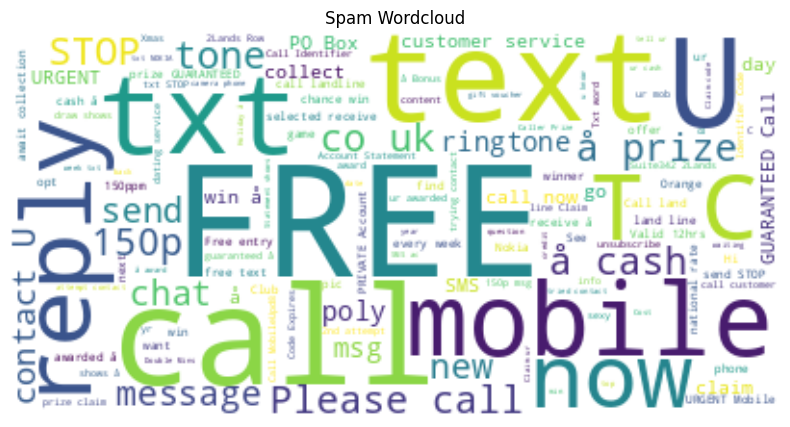

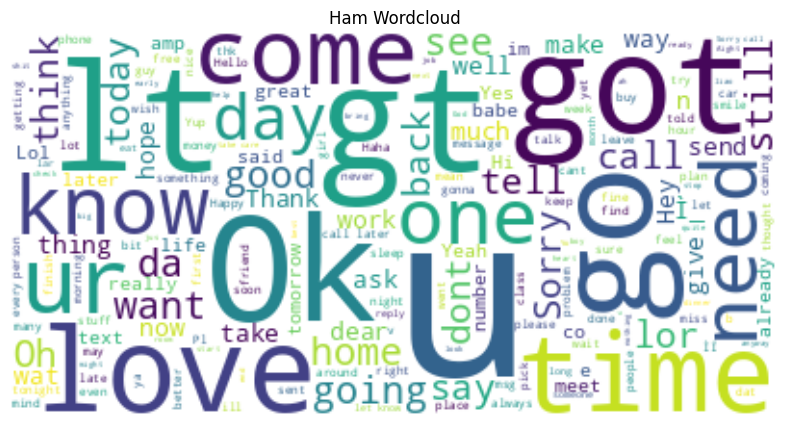

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


spam_text_string = " ".join(spam_words)
ham_text_string = " ".join(ham_words)

spam_wordcloud = WordCloud(background_color='white').generate(spam_text_string)


ham_wordcloud = WordCloud(background_color='white').generate(ham_text_string)

# Display the spam wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Wordcloud')
plt.axis("off")
plt.show()

# Display the ham wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Wordcloud')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()


X_bow = vectorizer.fit_transform(df['text'])

print("Shape of Bag-of-Words matrix:", X_bow.shape)

Shape of Bag-of-Words matrix: (5572, 8672)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_bow, df['label'], test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score for Bag-of-Words model: {f1}")

F1-score for Bag-of-Words model: 0.9136690647482014


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

In [ ]:

X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

print("Shape of Tf-IDF matrix:", X_tfidf.shape)

Shape of Tf-IDF matrix: (5572, 8672)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)


model_tfidf = LogisticRegression(solver='liblinear')


model_tfidf.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)


print(f"F1-score for Tf-IDF model: {f1_tfidf}")

F1-score for Tf-IDF model: 0.8416988416988417


In [ ]:
import nltk
nltk.download('punkt_tab', quiet=True)

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text) # Remove email addresses
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>', '', text)   # Remove HTML tags

    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

# Apply preprocessing to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Display the first few rows with the new column
display(df[['text', 'preprocessed_text']].head())

,text,preprocessed_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a TfidfVectorizer object
vectorizer_tfidf_preprocessed = TfidfVectorizer()

# Fit and transform the preprocessed text data
X_tfidf_preprocessed = vectorizer_tfidf_preprocessed.fit_transform(df['preprocessed_text'])

# Print the shape of the resulting Tf-IDF matrix
print("Shape of Tf-IDF matrix with preprocessing:", X_tfidf_preprocessed.shape)

Shape of Tf-IDF matrix with preprocessing: (5572, 7900)


In [ ]:
# Split the data into training and testing sets
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train_tfidf_preprocessed, y_test_tfidf_preprocessed = train_test_split(X_tfidf_preprocessed, df['label'], test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model_tfidf_preprocessed = LogisticRegression(solver='liblinear')

# Train the model
model_tfidf_preprocessed.fit(X_train_tfidf_preprocessed, y_train_tfidf_preprocessed)

# Make predictions
y_pred_tfidf_preprocessed = model_tfidf_preprocessed.predict(X_test_tfidf_preprocessed)

# Calculate the F1-score
f1_tfidf_preprocessed = f1_score(y_test_tfidf_preprocessed, y_pred_tfidf_preprocessed)

# Print the F1-score
print(f"F1-score for Tf-IDF model with preprocessing: {f1_tfidf_preprocessed}")

F1-score for Tf-IDF model with preprocessing: 0.768


In [ ]:
print(f"F1-score for Bag-of-Words model: {f1}")
print(f"F1-score for Tf-IDF model: {f1_tfidf}")
print(f"F1-score for Tf-IDF model with preprocessing: {f1_tfidf_preprocessed}")

F1-score for Bag-of-Words model: 0.9136690647482014
F1-score for Tf-IDF model: 0.8416988416988417
F1-score for Tf-IDF model with preprocessing: 0.768
